In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
from IPython.display import display

pd.np=np

# Prompt Engineering Evaluation: Visual Analysis

This notebook explores the evaluation of three different prompt types — **Direct**, **Conversational**, and **Contextual** — based on responses generated by a single language model (GPT-4o). Each prompt aims to elicit helpful, relevant, and accurate information in a B2C travel domain context.

I scored responses across 7 criteria:
- Business Contextual Fit
- User Intent Coverage
- Tone, Voice & Readability
- Structured Utility
- Creativity & Emotional Value
- Factual Relevance
- Actionability & Value Add

The total score (out of 21) reflects how well each response aligns with practical expectations.


## Reading CSV
#### The dataset is scored inside a CSV file

In [48]:
Dataset=pd.read_csv("Response_Evaluation.csv").dropna(how="all") #Clearing the null row at the beginning.
Dataset.head()

,Prompt ID,Customer Query,Prompt Type,Model Response,Business Contextual Fit,User Intent Coverage,"Tone, Voice, & Readability",Structured Utility,Creativity & Emotional Value,Factual Relevance,Actionability & Value Add,Total Score (0-21)
1,P1D,Plan a 5-day itinerary for Himachal Pradesh.,Direct,Here’s a **5-day itinerary** for **Himachal Pr...,3.0,3.0,3.0,3.0,2.5,3.0,3.0,20.5
2,P1C,I’ve been saving for a short break and love mo...,Context,That sounds like a perfect way to recharge! He...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,21.0
3,P1R,"Hey, I want to visit Himachal for 5 days — can...",Conversational,Absolutely! I'd love to help you plan a 5-day ...,3.0,2.0,3.0,2.0,2.0,3.0,2.0,17.0
4,P2D,Suggest budget-friendly travel destinations fo...,Direct,Here are **budget-friendly travel destinations...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,20.0
5,P2C,I’ve been meaning to travel solo but my budge...,Context,Absolutely! Solo travel on a tight budget is n...,3.0,3.0,3.0,3.0,2.5,3.0,3.0,20.5


# Rubric for scoring the responses

In [49]:
Rubric=pd.read_csv("Rubric_Project.csv")
styled = Rubric.style.set_properties(subset=['Description / Metrics'], **{'width': '800px'})
display(styled)

,Parameter,Score Range,Description / Metrics
0,1. Business Contextual Fit,0–3,"How well the response fits the business or platform context (e.g., travel app, discovery platform, concierge assistant).3 – Fully tailored to context and user intent2 – Mostly aligned but slightly generic1 – Vague fit or generic use case0 – Off-topic or unrelated"
1,2. User Intent Coverage,0–3,"How fully the response addresses the user's request.3 – Completely covers all aspects of the query (location, theme, logistics, etc.)2 – Mostly covers, may miss a small detail1 – Partially covers the ask0 – Misunderstands or ignores intent"
2,"3. Tone, Voice, & Readability",0–3,"The tone should be human, helpful, and match the theme (e.g., romantic, relaxing, adventure).3 – Engaging, well-structured, emotionally aligned2 – Clear and mostly appropriate tone1 – Robotic or slightly off-tone0 – Confusing or off-putting tone"
3,4. Structured Utility,0–3,"How well the content is organized and skimmable — sections, bullets, formatting, quick tips, etc.3 – Clear structure (e.g., place name, why go, stay options, romantic touch, etc.)2 – Mostly well-structured, slightly cluttered1 – Unclear or inconsistently structured0 – Wall of text"
4,5. Creativity & Emotional Value,0–3,"Is there anything that surprises, delights, or makes the answer memorable?3 – Unique romantic touches, clever phrasing, emotion-rich2 – Some emotional hooks or creative additions1 – Dry or copy-paste tone0 – No originality or warmth"
5,6. Factual Relevance,0–3,"Are the travel times, hotel names, and geographic references accurate and relevant?3 – Fully correct and updated2 – Minor generalization but mostly correct1 – Some inaccuracies or generality0 – Outdated or wrong facts"
6,7. Actionability & Value Add,0–3,"Does the response offer a clear next step, suggestion, or booking help?3 – Includes tailored CTAs, comparisons, or follow-ups2 – Useful info but no next steps1 – Basic info only0 – No actionability"


## Line Plot Analysis: Average Parameter Scores Across Prompt Types


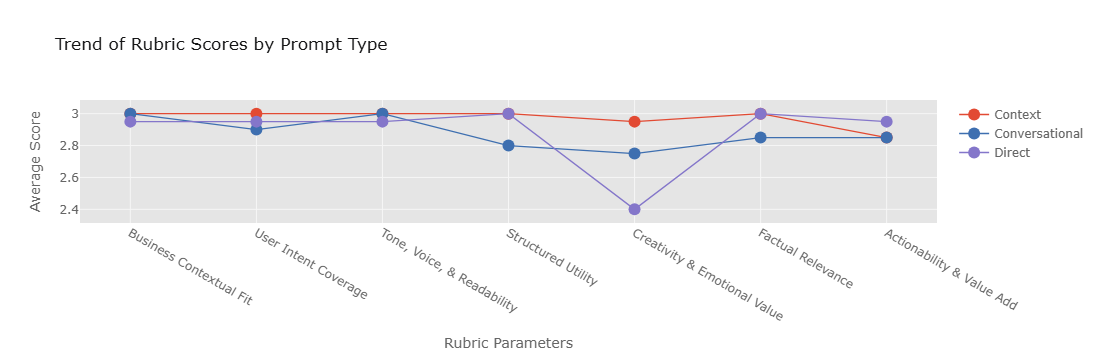

In [53]:
Calc=Dataset.drop(columns=["Model Response","Customer Query","Prompt ID", "Total Score (0-21)"],axis=1)

Calc.head()
grouped=Calc.groupby("Prompt Type").mean()
grouped.T.iplot(kind='line', mode='lines+markers',
                title="Trend of Rubric Scores by Prompt Type",
                xTitle="Rubric Parameters", yTitle="Average Score")



This line graph visualizes the **average scores** of each prompt type across seven rubric parameters.

####  Key Insights:
 
1. **Contextual Prompts**:

>    * Lead in **User Intent Coverage**, **Factual Relevance**, **Structured Utility**, and **Business Contextual Fit** — all with perfect or near-perfect 3.0 scores.
>    * Slightly lower in **Creativity & Emotional Value (2.95)** but still higher than others.
>    * ✅**Insight**: Contextual prompts are consistently the top performer, excelling in structured, business-aligned, and factually relevant outputs.

2. **Conversational Prompts**:

>    * Perform equally well in **Tone, Voice, & Readability** (3.0), suggesting a natural, engaging tone.
>    * Slightly behind in **User Intent Coverage (2.9)** and **Factual Relevance (2.85)**.
>    * ✅ **Insight**: These are more stylistically engaging but less reliable in conveying intent or structured outcomes.

3. **Direct Prompts**:

>    * Surprising strength in **Factual Relevance (3.0)** and **Structured Utility (3.0)**.
>    * Lowest in **Creativity & Emotional Value (2.4)** — indicating a rigid or flat tone.
>    * ✅ **Insight**: Direct prompts are functionally strong but lack warmth or nuanced understanding, which may affect engagement.

> #### Takeaway:
>
> Contextual prompts offer **balanced and consistent high performance**, while conversational ones shine in tone but vary in substance. Direct prompts are best suited for fact retrieval but may not deliver on emotional or user-centric dimensions.
>
> These findings support using **Contextual prompting as a default**, while blending in conversational cues or directness when needed depending on use-case.



## Average Score of all Prompt Types

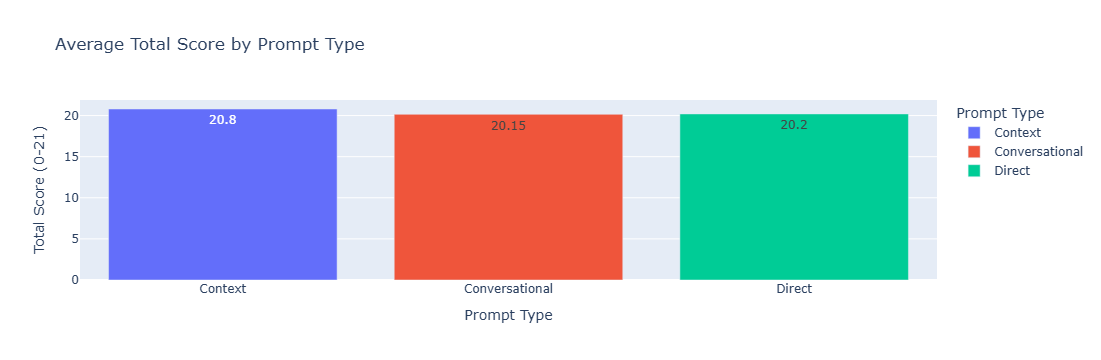

In [81]:
fig = px.bar(
    Dataset.groupby("Prompt Type")["Total Score (0-21)"].mean().reset_index(),
    x="Prompt Type", y="Total Score (0-21)",
    title="Average Total Score by Prompt Type",width=500,color="Prompt Type",
    text_auto=True
)
fig.show()


This bar chart displays the **average total score** out of 21 for each of the three prompt types: **Direct**, **Conversational**, and **Contextual**.

**Observations:**
- **Contextual prompts** achieved the highest average score.
- **Conversational prompts**, while natural-sounding, score slightly lower — possibly due to ambiguity or informal tone.
- **Direct prompts** perform better than Conversational prompts, often lacking nuance or emotional depth.
- However, the margin between prompt types is relatively small, and the sample size is limited.
- It's unclear whether the improvement is due to prompt design or incidental phrasing.
  
**What this suggests:**
- Contextual framing may help the model generate responses that **cover more dimensions**.
- These prompts often contain **background information or user profile context**, which could be giving the model more clues — leading to slightly stronger responses.

**Why this matters:**
- In real-world applications (like travel chatbots), providing **light context** may subtly boost output quality — not dramatically, but consistently.
- That said, more data is needed to make a firm conclusion.









## Box Plot Analysis: Prompt Score Distributions


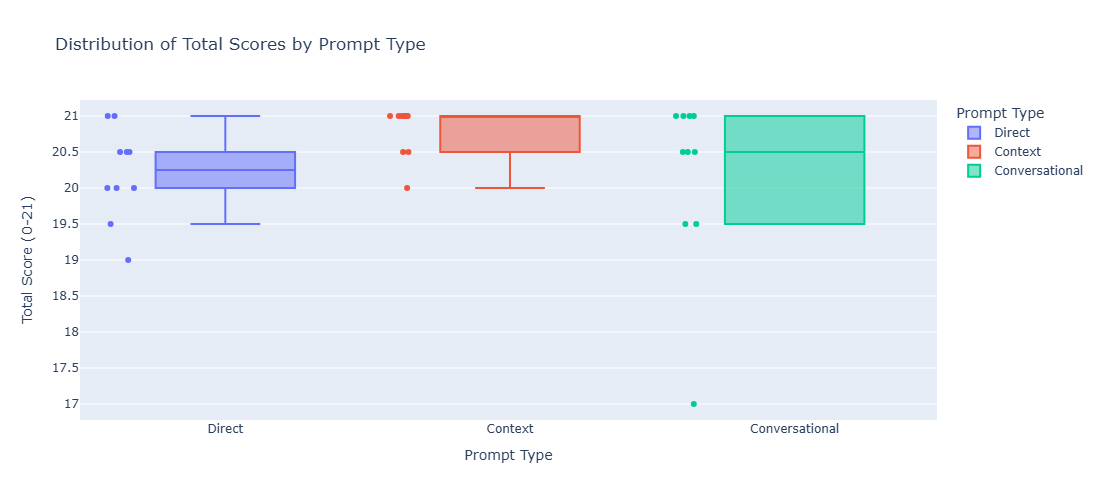

In [56]:
import plotly.express as px

fig = px.box(
    Dataset, 
    x="Prompt Type", 
    y="Total Score (0-21)",
    points="all",  # Show individual data points
    color="Prompt Type",
    title="Distribution of Total Scores by Prompt Type"
)

fig.update_layout(width=800, height=500)
fig.show()


- **Contextual Prompts** had the **highest median score**, showing consistent performance across evaluation criteria.
- **Conversational Prompts** showed greater variability, with some outliers scoring significantly lower than average.
- **Direct Prompts** clustered tightly around the median, indicating uniform but average performance.

Outliers suggest areas for further refinement in prompt phrasing or content targeting.


## Scatter Plot – Creativity vs Factual Relevance


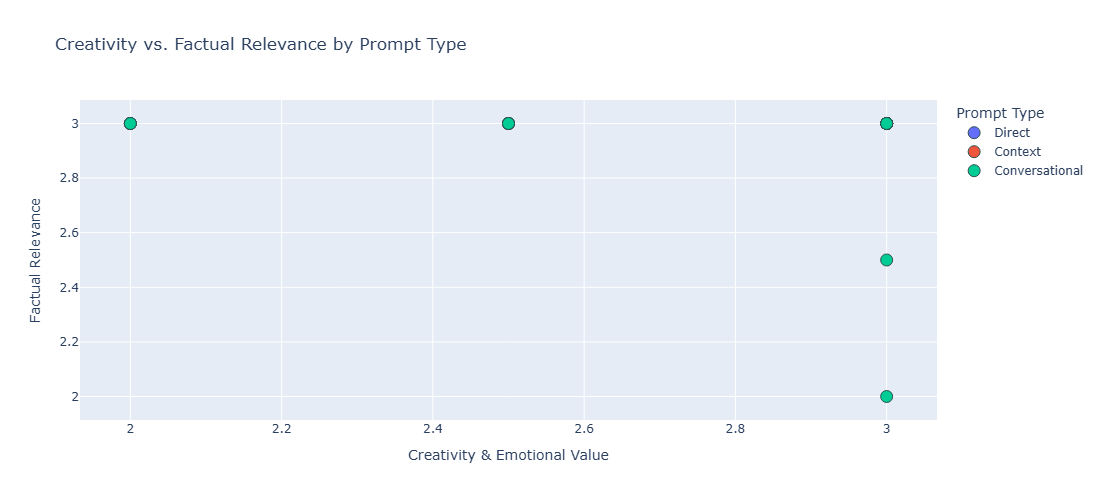

In [57]:
import plotly.express as px

fig = px.scatter(
    Dataset,
    x="Creativity & Emotional Value",
    y="Factual Relevance",
    color="Prompt Type",
    title="Creativity vs. Factual Relevance by Prompt Type",
    labels={
        "Creativity & Emotional Value": "Creativity",
        "Factual Relevance": "Factual Accuracy"
    },
    hover_data=["Prompt Type", "Total Score (0-21)"],
    width=700,
    height=500
)

fig.update_traces(marker=dict(size=12, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis=dict(title="Creativity & Emotional Value"),
    yaxis=dict(title="Factual Relevance"),
    legend_title="Prompt Type"
)

fig.show()


### Finding: The more creative the prompt, the less factually relevant it is. Creativity kills factuality! (or at least tries to)
- There is a noticeable inverse relationship between creativity and factual accuracy.

- Prompts that scored higher on creativity tended to score lower on factual relevance, and vice versa. This suggests a trade-off: as prompts become more expressive or emotionally rich, they are more likely to deviate from strict factual correctness.